# PIVPy example

In [1]:
import os, sys
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sys.path.append('../../')

In [3]:
from pivpy import io, graphics, pivpy

In [4]:
filename = '../data/Run000001.T000.D000.P000.H001.L.vec'
variables, units, rows, cols, dt, frame = io.parse_header(filename)
data = io.loadvec(filename,rows,cols)

Run000001.T000.D000.P000.H001.L.vec 1


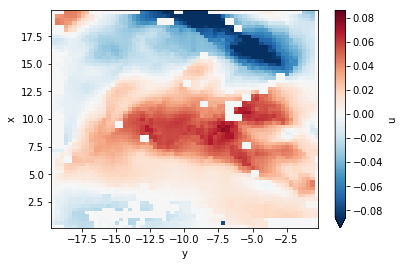

In [5]:
data['u'].plot(robust=True)

In [6]:
# data.to_netcdf('test.nc')

In [7]:
data.u.shape

(1, 63, 63)

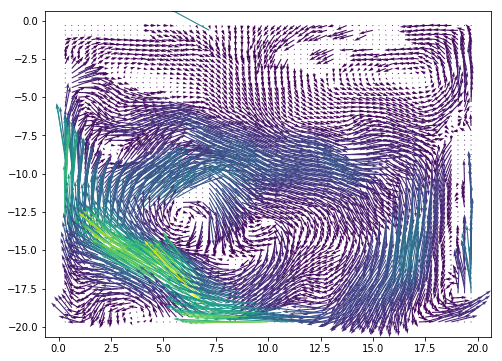

In [8]:
plt.figure(figsize=(8,6))
plt.quiver(data.x,data.y,data.u[0,:,:], data.v[0,:,:] ,data.u[0,:,:]**2 + data.v[0,:,:]**2,scale=.75)

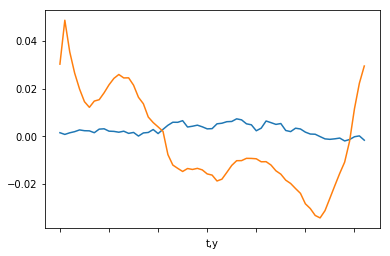

In [9]:
# profile along y
data.mean(dim='x').to_dataframe()['u'].plot()
data.mean(dim='x').to_dataframe()['v'].plot()

In [10]:
data  = io.load_directory('../data')

Run000001.T000.D000.P000.H001.L.vec 1


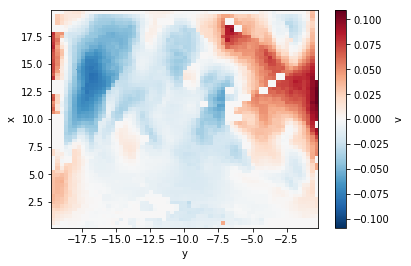

In [11]:
data.isel(t=0)['v'].plot()

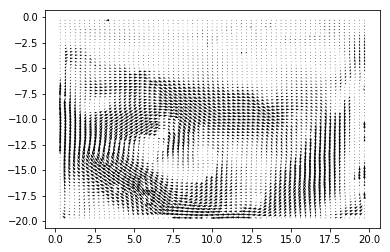

In [12]:
plt.quiver(data['x'],data['y'],data.u.mean(dim='t'),data.v.mean(dim='t'))

AttributeError: 'Dataset' object has no attribute 'lUnits'

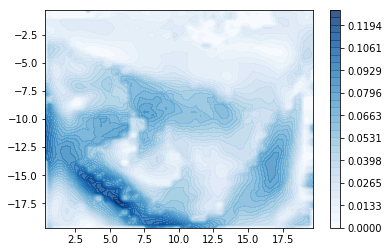

In [13]:
graphics.quiver(data.piv.average)

In [ ]:
graphics.showf(data)

In [ ]:
# equivalent to averf 
graphics.showf(data.mean(dim='t'),variables = data.attrs['variables'], units=data.attrs['units'])